## Análise sobre Crédito de Risco na Alemanha

##### Columns

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [38]:
#!pip install missingno

In [39]:
import pandas as pd
import numpy as np
import missingno as msno

In [57]:
credit = pd.read_csv('german_credit_data.csv')

In [58]:
credit.rename(columns = {'Unnamed: 0': 'Order', 'Saving accounts':'Saving_accounts', 
                        'Checking account':'Checking_account', 'Credit amount': 'Credit_amount'}, inplace=True)

In [59]:
credit

,Order,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [60]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving_accounts   817 non-null    object
 6   Checking_account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


### Dados ausentes

Order                0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving_accounts     18.3
Checking_account    39.4
Credit_amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64


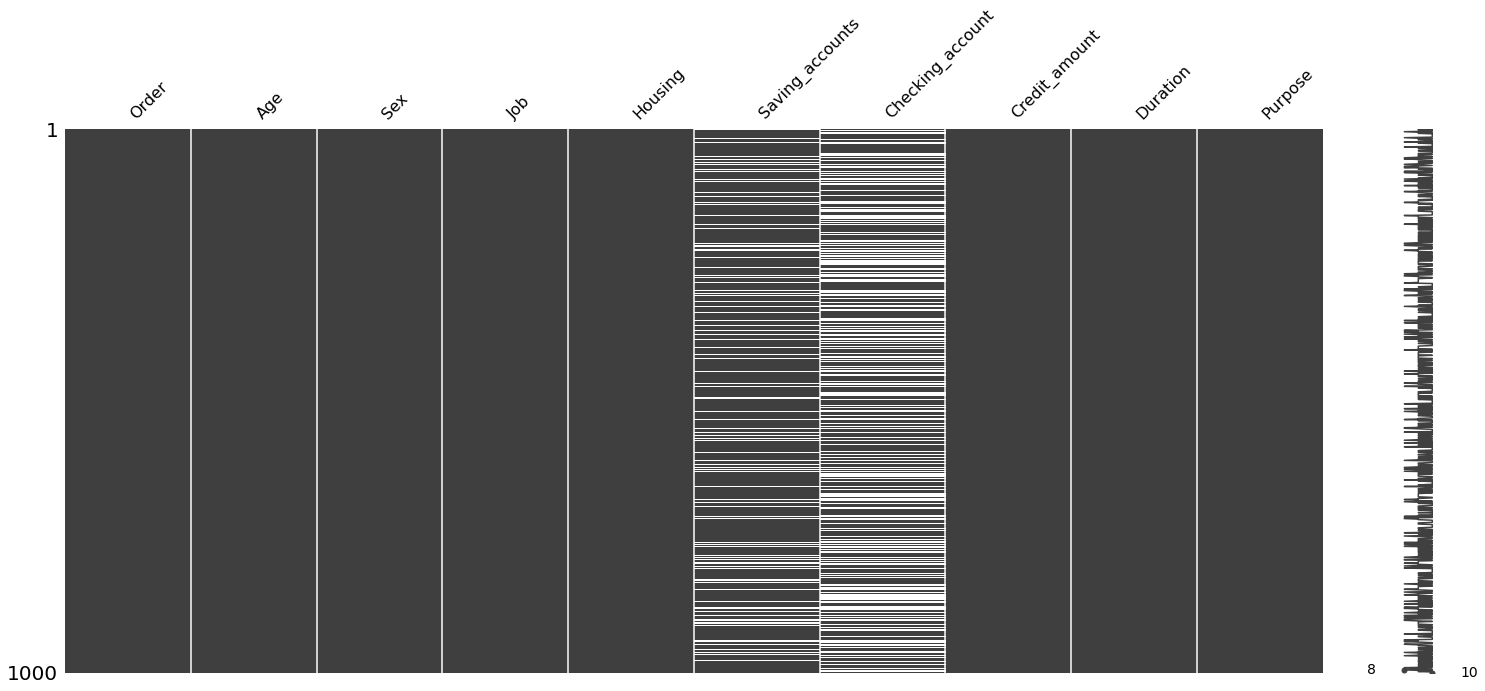

In [61]:
#print(np.unique(credit['Saving_accounts'], return_counts=True))
print(credit.isnull().mean() * 100)

ax = msno.matrix(credit)
ax.get_figure().savefig("mlpr.png")

### Inputando valores nas colunas vazias

In [63]:
# Acrescenta coluna informativa: ausência de dados
def add_indicador(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

In [64]:
credit = credit.assign(
    Saving_accounts_missing=add_indicador("Saving_accounts"),
    Checking_account_missing=add_indicador("Checking_account")
)

In [66]:
credit.fillna({'Saving_accounts':'unknown', 'Checking_account':'unknown'}, inplace=True) # Inputa valor a coluna

In [68]:
credit

,Order,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Saving_accounts_missing,Checking_account_missing
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,1,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0,0
2,2,49,male,1,own,little,unknown,2096,12,education,0,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,0
4,4,53,male,2,free,little,little,4870,24,car,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,unknown,1736,12,furniture/equipment,0,1
996,996,40,male,3,own,little,little,3857,30,car,0,0
997,997,38,male,2,own,little,unknown,804,12,radio/TV,0,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,0,0


In [69]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Order                     1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Sex                       1000 non-null   object
 3   Job                       1000 non-null   int64 
 4   Housing                   1000 non-null   object
 5   Saving_accounts           1000 non-null   object
 6   Checking_account          1000 non-null   object
 7   Credit_amount             1000 non-null   int64 
 8   Duration                  1000 non-null   int64 
 9   Purpose                   1000 non-null   object
 10  Saving_accounts_missing   1000 non-null   int32 
 11  Checking_account_missing  1000 non-null   int32 
dtypes: int32(2), int64(5), object(5)
memory usage: 86.1+ KB


In [18]:
#print(credit[['Saving_accounts','Checking_account']])
credit.groupby(['Saving_accounts','Checking_account']).count()

Order  Age  Sex  Job  Housing  \
Saving_accounts Checking_account                                  
little          little              219  219  219  219      219   
                moderate            152  152  152  152      152   
                rich                 41   41   41   41       41   
moderate        little               12   12   12   12       12   
                moderate             47   47   47   47       47   
                rich                  5    5    5    5        5   
quite rich      little                8    8    8    8        8   
                moderate             11   11   11   11       11   
                rich                  4    4    4    4        4   
rich            little                6    6    6    6        6   
                moderate             14   14   14   14       14   
                rich                  3    3    3    3        3   

                                  Credit_amount  Duration  Purpose  
Saving_accounts Checking_account                                    
little          little                      219       219      219  
                moderate                    152       152      152  
                rich                         41        41       41  
moderate        little                       12        12       12  
                moderate                     47        47       47  
                rich                          5         5        5  
quite rich      little                        8         8        8  
                moderate                     11        11       11  
                rich                          4         4        4  
rich            little                        6         6        6  
                moderate                     14        14       14  
                rich                          3         3        3

<a href="https://www.kaggle.com/uciml/german-credit">Fonte da base</a>